# Neural Network

A neural network is a machine learning program, or model, that makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions.

Every neural network consists of layers of nodes, or artificial neurons—an input layer, one or more hidden layers, and an output layer. Each node connects to others, and has its own associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

In [41]:
# Imports

%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [42]:
tf.__version__


'2.15.0'

For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [4]:
# load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

#Split into training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
train_images.shape


(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
len(train_images)

60000

In [11]:
len(test_images)

10000

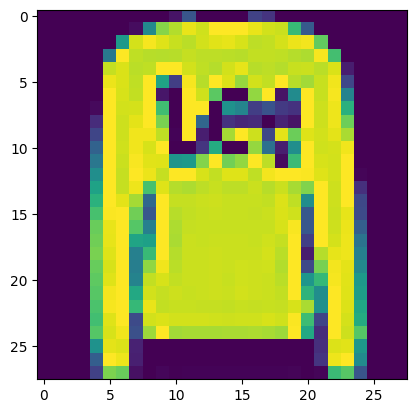

In [12]:
#Lets have a look of one pixel

test_images[0,:,:]
plt.imshow(test_images[1])

In [14]:
#Lets hace a look at the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

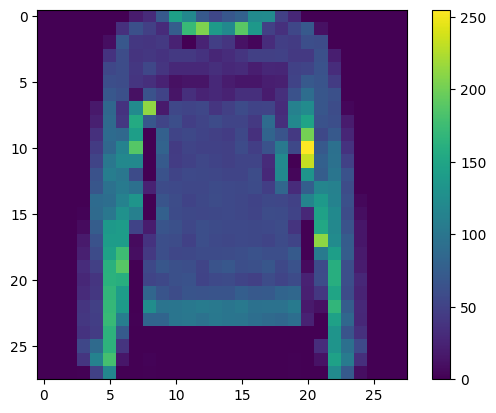

In [18]:
# Lets look at what some of therse images look like

plt.figure()
plt.imshow(train_images[400])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

- The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model.

In [19]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [20]:
train_images = train_images/ 255.0
test_images = test_images/255.0

In [21]:
train_images[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building the Models
- For building the model, we are going to use a keras sequential model with three different layers.
- This layer represents a feed-forward neural networl(one that passes values from left to right)

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   #input layer
    keras.layers.Dense(128, activation = 'relu'),   #hidden layer
    keras.layers.Dense(10, activation = 'softmax')   #output layer
])

# compile the model
- The last step in building the model is to define the loss function, optimizer and metrics.

In [26]:
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

# Training the model

In [27]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 64)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5161 - accuracy: 0.8198
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3841 - accuracy: 0.8637
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3467 - accuracy: 0.8753
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3197 - accuracy: 0.8834
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3018 - accuracy: 0.8883
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2884 - accuracy: 0.8941
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2741 - accuracy: 0.9006
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2642 - accuracy: 0.9022
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2533 - accuracy: 0.9055
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2458 - accuracy: 0.9080

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Evaluating the model

Now it's time to test/evaluate the model.

The verbose argument is defined from the keras documentation as:
verbose:0 or 1.
Verbosity mode 0 = silent,
          mode 1 = Prgress bar

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test accuracy:' , test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3347 - accuracy: 0.8831
Test accuracy: 0.8830999732017517


# Model Predictions
- To make predictions we simply need to pass an aray of data in the from we've specified in the input layer to .predict() method.

In [30]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [31]:
predictions[0]

array([1.05736255e-07, 2.07002486e-08, 1.03343829e-07, 6.75380363e-07,
       6.74854590e-08, 2.23106705e-03, 6.33874492e-07, 2.11497359e-02,
       3.48514936e-06, 9.76614118e-01], dtype=float32)

In [32]:
predictions[300]

array([1.0274343e-04, 7.5747208e-03, 1.5729851e-05, 9.9179745e-01,
       7.2757961e-05, 4.6323388e-05, 1.2946189e-04, 1.8364145e-06,
       2.5583289e-04, 2.9603473e-06], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax().
This simply returns the index of the maximum value from a numpy array.

In [35]:
for i in range(10):
  print(predictions[0][i],i)

1.05736255e-07 0
2.0700249e-08 1
1.0334383e-07 2
6.7538036e-07 3
6.748546e-08 4
0.002231067 5
6.338745e-07 6
0.021149736 7
3.4851494e-06 8
0.9766141 9


In [37]:
test_labels[0]

9

In [38]:
test_labels[4]

6

In [39]:
test_labels[123]

9

# Verify Predictions

Pick a number: 5
1/1 [==============================] - 0s 27ms/step
Expected: Trouser, Guess :Trouser


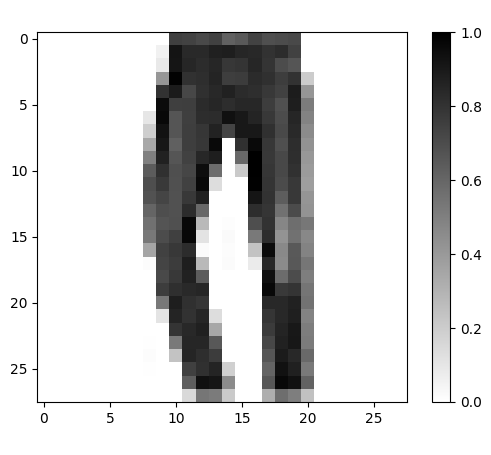

In [40]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.title("Excpected: " + label)
  print(f"Expected: {label}, Guess :{guess}")
  plt.xlabel("Guess: " + guess)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


# Sources:
Doshi, Sanket. “Various Optimization


1. Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing  :   TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

4. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

5. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.
